<a href="https://colab.research.google.com/github/Mmusagezer/Fall_Detection/blob/main/fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [3]:

df = pd.read_csv("falldetection_dataset.csv" )



In [4]:

df.head()

,1,F,-1.444005966,51.89702511,9.0512060884,39.154050074,4.8614144124,30.582530356,26.361643486,5.0308849818,...,0.1065019974,0.1043545002,0.1018808742,0.0991048454,0.096072518,0.0928180356,0.0893668642,0.0857554284,0.0820069854,0.0781689946
0,2,F,-2.336273,35.644388,6.443654,24.827069,2.555905,14.351492,17.849532,10.018803,...,0.140290,0.136737,0.132445,0.127476,0.121855,0.115662,0.108960,0.101812,0.094281,0.086417
1,3,F,-3.160453,40.378218,6.126165,25.891205,3.261484,21.788334,16.620108,11.252057,...,0.160107,0.156836,0.153264,0.149447,0.145445,0.141263,0.136920,0.132413,0.127757,0.122951
2,4,F,-2.991333,44.093847,6.691918,28.082497,4.566522,31.905741,16.683106,6.005130,...,0.141562,0.138675,0.135498,0.132100,0.128517,0.124782,0.120944,0.116979,0.112901,0.108734
3,5,F,-3.079600,45.901880,6.674186,32.691078,4.156527,26.843041,21.150885,7.725367,...,0.178837,0.173142,0.166420,0.158743,0.150204,0.140860,0.130797,0.120147,0.108993,0.097428
4,6,NF,4.079742,11.004858,7.677224,2.800597,-0.585596,0.283626,2.589098,2.390467,...,0.069590,0.067171,0.064559,0.061756,0.058794,0.055705,0.052487,0.049180,0.045790,0.042348


Explained variance ratio: [0.23094147 0.17637566]
Total explained variance ratio: 0.4073171323575902


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


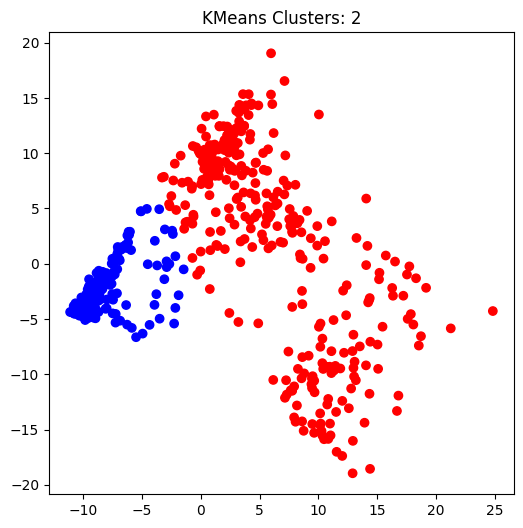

Overlap:
col_0    0    1
F              
F      266   46
NF      59  194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


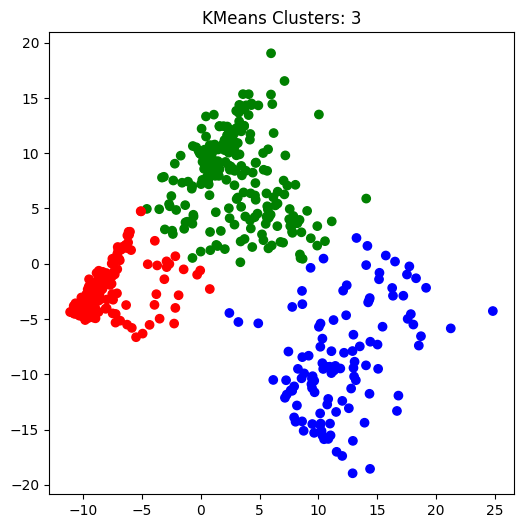

Overlap:
col_0    0    1    2
F                   
F       46  109  157
NF     192    5   56


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


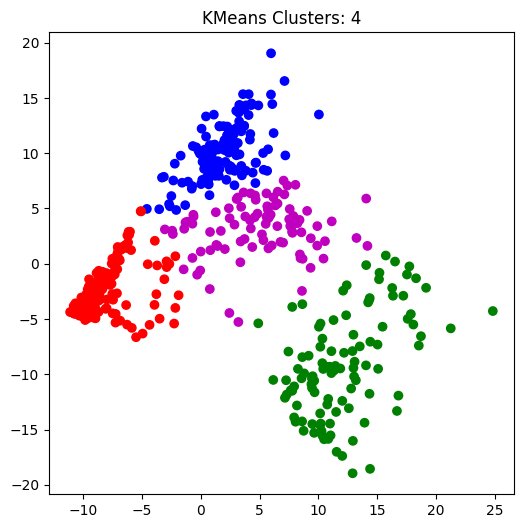

Overlap:
col_0    0   1    2   3
F                      
F       46  96  104  66
NF     188  36    3  26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


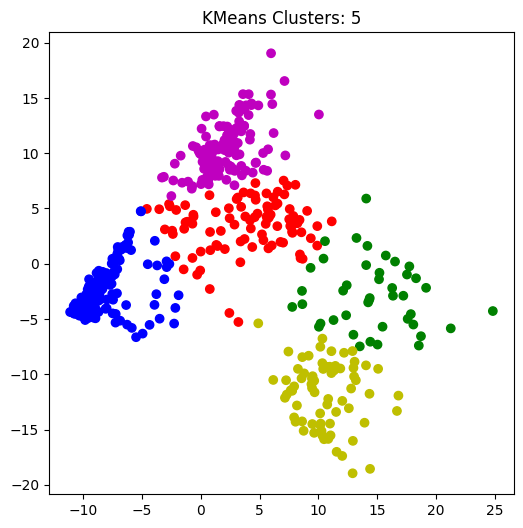

Overlap:
col_0   0    1   2   3   4
F                         
F      61   46  39  95  71
NF     33  187   3  29   1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


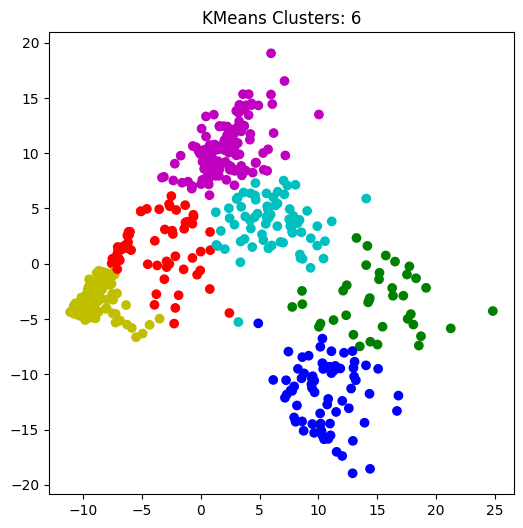

Overlap:
col_0   0   1   2   3    4   5
F                             
F       4  71  35  95   43  64
NF     64   1   3  29  148   8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


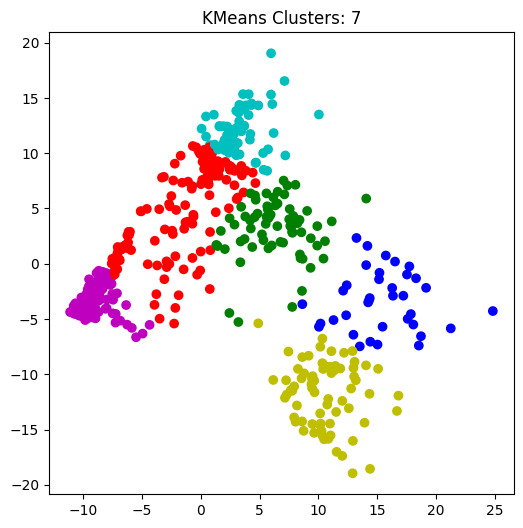

Overlap:
col_0   0   1   2    3   4   5   6
F                                 
F       4  34  61   42  71  56  44
NF     55   2   8  146   1  15  26


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


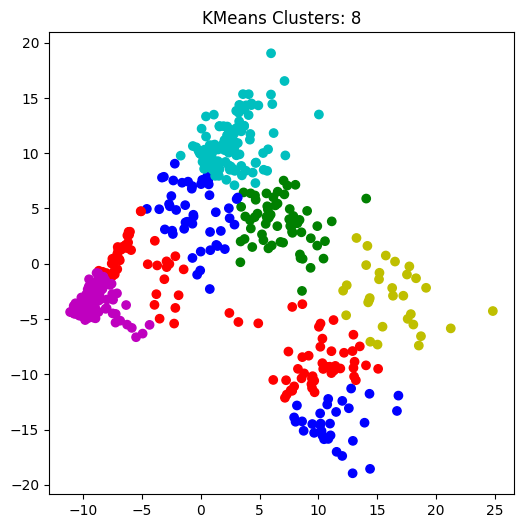

Overlap:
col_0   0   1   2    3   4   5   6   7
F                                     
F       4  31  58   42  30  89  46  12
NF     49   0   3  140   0  21   4  36


In [7]:
labels = df.iloc[:, 1]
features = df.iloc[:, 2:]
#WITHOUT SCALING, CLUSTER RESULTS WERE NOT SUFFICIENT
features = StandardScaler().fit_transform(features)
#pca with two components
n_components = 2
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(features)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component ' + str(i) for i in range(1, n_components+1)])
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Total explained variance ratio:', sum(pca.explained_variance_ratio_))
for clusters in range(2, 9):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(principalDf)

    # create scatter plot
    plt.figure(figsize=(6,6))
    colors = ['rbgmyc'[i%6] for i in kmeans.labels_]
    plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=colors)
    plt.title('KMeans Clusters: ' + str(clusters))
    plt.savefig('KMeans Clusters_' + str(clusters) + '.png')
    plt.show()

    
    predicted_labels = kmeans.labels_
    overlap = pd.crosstab(labels, predicted_labels)
    print("Overlap:")
    print(overlap)



In [8]:


scaler = StandardScaler()
scaled_features = scaler.fit_transform(principalDf)

X_temp, X_test, y_temp, y_test = train_test_split(scaled_features, labels, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42)


In [11]:
#different parameters for svm
svm_param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, verbose=2)
svm_grid_search.fit(X_train, y_train)

print("Best SVM parameters: ", svm_grid_search.best_params_)

print("Best SVM score: ", svm_grid_search.best_score_)

#different parameters for mlp
mlp_param_grid = {
    'hidden_layer_sizes': [(50,100,50), (100,)],
    'activation': ['sigmoid', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=200), mlp_param_grid, cv=5, verbose=2)
mlp_grid_search.fit(X_train, y_train)

print("Best MLP parameters: ", mlp_grid_search.best_params_)

print("Best MLP score: ", mlp_grid_search.best_score_)

best_svm_model = svm_grid_search.best_estimator_
svm_test_predictions = best_svm_model.predict(X_test)
print("SVM Test Performance: ")
print(classification_report(y_test, svm_test_predictions))

best_mlp_model = mlp_grid_search.best_estimator_
mlp_test_predictions = best_mlp_model.predict(X_test)
print("MLP Test Performance: ")
print(classification_report(y_test, mlp_test_predictions))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, ke

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=sgd; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=adam; total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=adam; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=adam; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=adam; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 100, 50), learning_rate=constant, solver=adam; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perc

[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.5s
Best MLP parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best MLP score:  0.8734177215189873
SVM Test Performance: 
              precision    recall  f1-score   support

           F       0.90      0.88      0.89        52
          NF       0.82      0.85      0.84        33

    accuracy                           0.87        85
   macro avg       0.86      0.87      0.86        85
weighted avg       0.87      0.87      0.87        85

MLP Test Performance: 
              precision    recall  f1-score   support

           F       0.90      0.87      0.88        52
          NF       0.80      0.85      0.82        33

    accuracy                           0.86        85
   macro avg       0.85      0.86      0.85        85
weighted avg       0.86      0.86      0.86       

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
